In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# 设定的超参数
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# 构造一些数据
train_X = numpy.asarray([-10.0,-9.0,-8.0,-7.0,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0])
train_Y = numpy.asarray([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1])
n_samples = train_X.shape[0]

Epoch: 0050 cost= 0.184476092 W= -0.0783956 b= 0.0908792
Epoch: 0100 cost= 0.048275080 W= 0.167394 b= 0.0878276
Epoch: 0150 cost= 0.031181555 W= 0.258287 b= 0.0855689
Epoch: 0200 cost= 0.024824297 W= 0.314357 b= 0.0838741
Epoch: 0250 cost= 0.021304172 W= 0.356192 b= 0.0824613
Epoch: 0300 cost= 0.018986057 W= 0.390172 b= 0.081224
Epoch: 0350 cost= 0.017305879 W= 0.419113 b= 0.0801099
Epoch: 0400 cost= 0.016012166 W= 0.444512 b= 0.0790886
Epoch: 0450 cost= 0.014973772 W= 0.467271 b= 0.0781408
Epoch: 0500 cost= 0.014114794 W= 0.48797 b= 0.0772532
Epoch: 0550 cost= 0.013387750 W= 0.507014 b= 0.0764162
Epoch: 0600 cost= 0.012761198 W= 0.524693 b= 0.0756227
Epoch: 0650 cost= 0.012213372 W= 0.541224 b= 0.0748668
Epoch: 0700 cost= 0.011728676 W= 0.556773 b= 0.0741447
Epoch: 0750 cost= 0.011295537 W= 0.571472 b= 0.0734522
Epoch: 0800 cost= 0.010905122 W= 0.585427 b= 0.0727867
Epoch: 0850 cost= 0.010550727 W= 0.598723 b= 0.0721449
Epoch: 0900 cost= 0.010227019 W= 0.611429 b= 0.0715259
Epoch: 095

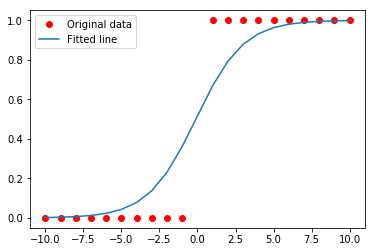

In [22]:
# tf 计算图的 输入
X = tf.placeholder("float")
Y = tf.placeholder("float")

# 设定模型权重
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")
# 构建一个逻辑回归模型
Wx_add_b = tf.multiply(X, W) + b
pred = tf.sigmoid(Wx_add_b)
# 均方误差
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# 梯度下降
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# 初始化变量
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    # 拟合训练数据
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #每个epoch输出信息
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c),
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    prediction_value = sess.run(pred,feed_dict={X:train_X})
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, prediction_value, label='Fitted line')
    plt.legend()
    plt.show()